In [121]:
install.packages("cowplot")
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [122]:
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)
library(cowplot)

In [26]:
wine <- read_csv('winequality-red.csv')
t <- wine %>%
    mutate(quality = as.factor(quality))
head(t, n = 5)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [40]:
set.seed(20)
wine_split <- initial_split(t, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split) 


In [134]:
plot_volatile_acidity <- ggplot(wine_train, aes(y=volatile_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="volatile acidity")+
    ggtitle("Figure 1: Box plot of volatile acidity versus quality.")

In [135]:
plot_fixed_acidity <- ggplot(wine_train, aes(y=fixed_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="fixed acidity")+
    ggtitle("Figure 2: Box plot of fixed acidity versus quality.")

In [136]:
plot_citric_acid <- ggplot(wine_train, aes(y=citric_acid, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="citric acid")+
    ggtitle("Figure 3: Box plot of citric acid versus quality.")

In [137]:
plot_residual_sugar <- ggplot(wine_train, aes(y=residual_sugar, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="residual sugar")+
    ggtitle("Figure 4: Box plot of residual sugar versus quality.")

In [138]:
plot_chlorides <- ggplot(wine_train, aes(y=chlorides, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="chlorides")+
    ggtitle("Figure 5: Box plot of chlorides versus quality.")

In [139]:
plot_free_sulfur_dioxide <- ggplot(wine_train, aes(y=free_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free sulfur dioxide")+
    ggtitle("Figure 6: Box plot of free sulfur dioxide versus quality.")

In [140]:
plot_total_sulfur_dioxide <- ggplot(wine_train, aes(y=total_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free total sulfur dioxide")+
    ggtitle("Figure 7: Box plot of free total sulfur dioxide versus quality.")

In [141]:
plot_density <- ggplot(wine_train, aes(y=density, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="density dioxide")+
    ggtitle("Figure 8: Box plot of density versus quality.")

In [142]:
plot_pH <- ggplot(wine_train, aes(y=pH, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="pH")+
    ggtitle("Figure 9: Box plot of pH versus quality.")

In [143]:
plot_sulphates <- ggplot(wine_train, aes(y=sulphates, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="sulphates")+
    ggtitle("Figure 10: Box plot of sulphates versus quality.")

In [144]:
plot_alcohol <- ggplot(wine_train, aes(y=alcohol, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="alcohol")+
    ggtitle("Figure 11: Box plot of alcohol versus quality.")

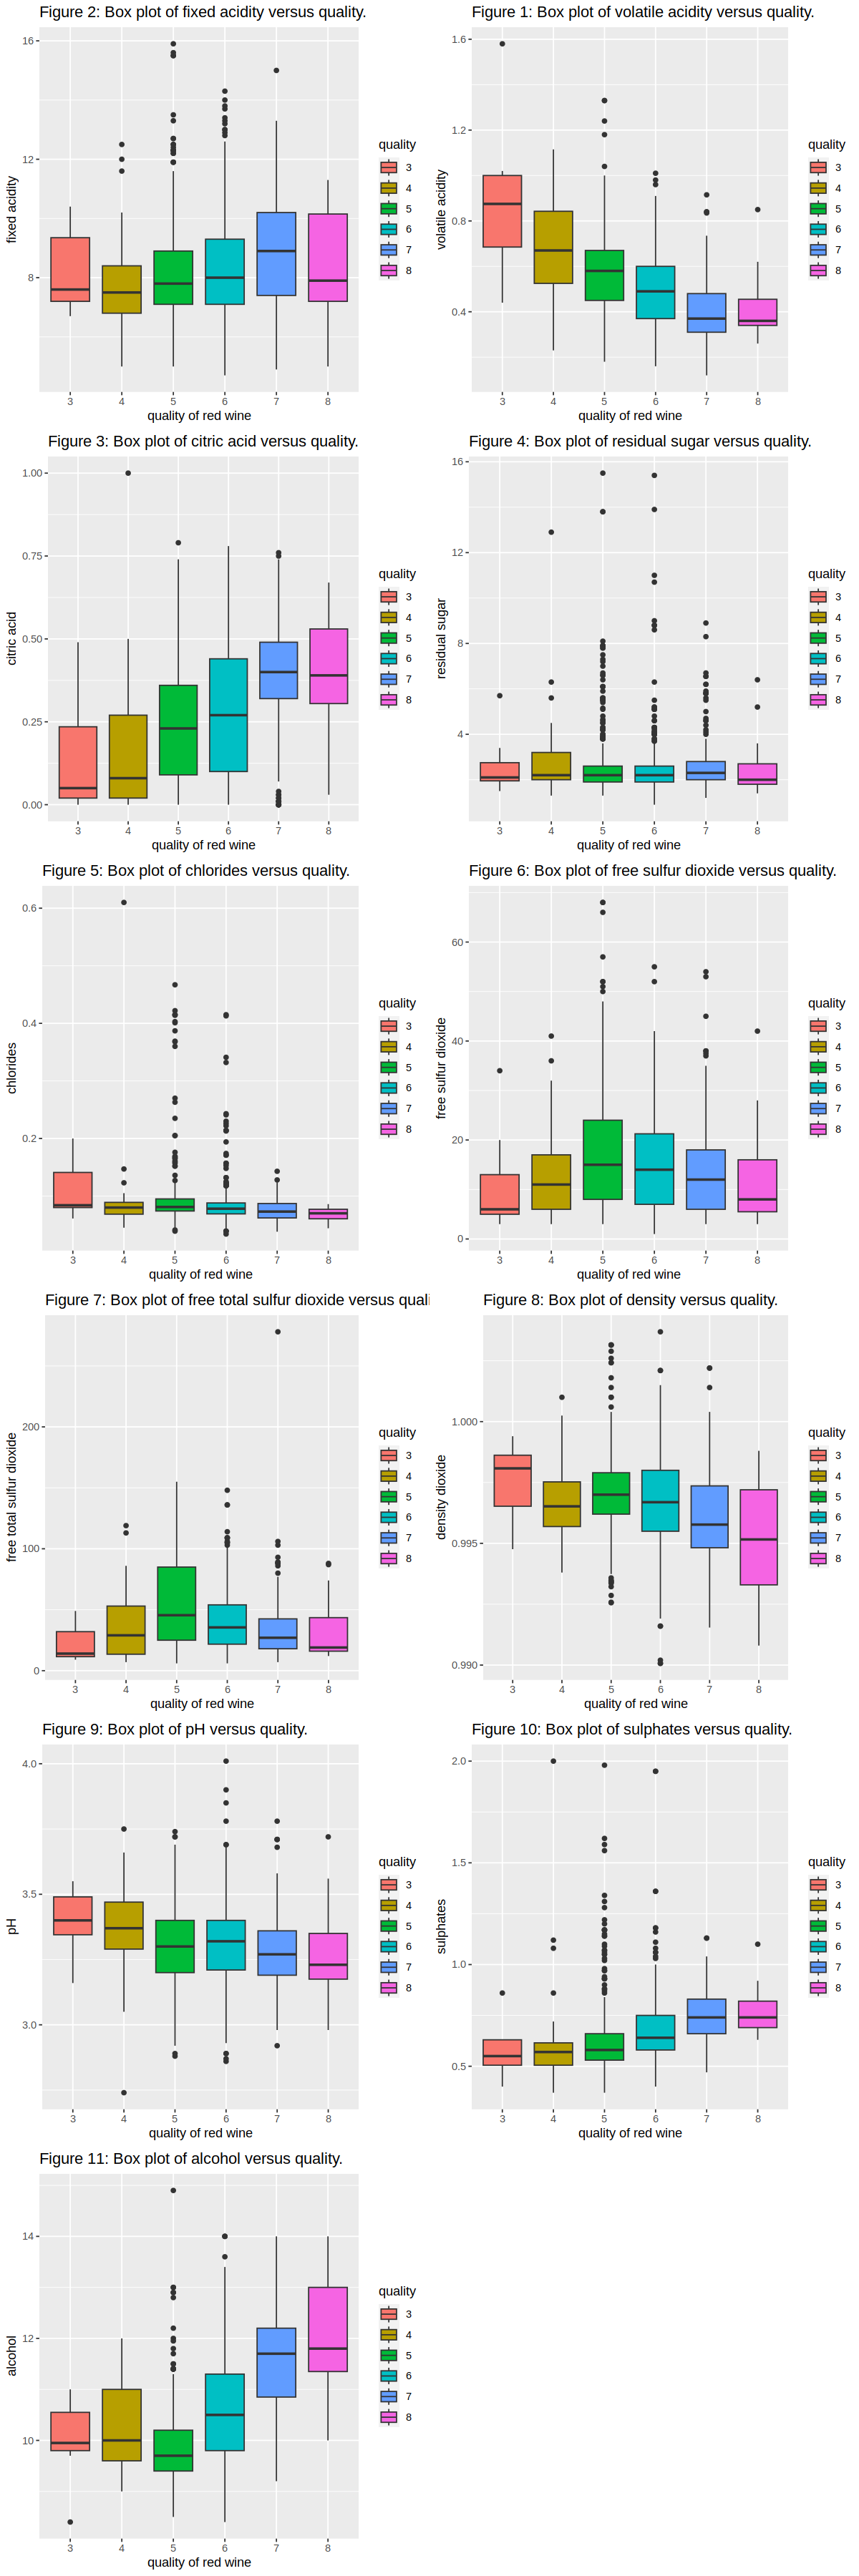

In [145]:
options(repr.plot.width=10, repr.plot.height=30)
plot_grid(plot_fixed_acidity, plot_volatile_acidity , 
          plot_citric_acid, plot_residual_sugar, 
          plot_chlorides, plot_free_sulfur_dioxide,
          plot_total_sulfur_dioxide , plot_density,
          plot_pH, plot_sulphates,
          plot_alcohol,ncol = 2)
          

In [146]:
set.seed(2020)
wine_recipe <- recipe(quality ~  citric_acid + volatile_acidity + alcohol, data = wine_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
wine_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [147]:
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

wine_fit <- workflow() |>
       add_recipe(wine_recipe) |>
       add_model(knn_spec) |>
       fit(data = wine_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4624374
Best kernel: rectangular
Best k: 3

In [148]:
set.seed(2020)
wine_test_predictions <- predict(wine_fit , wine_test) |>
       bind_cols(wine_test)

head(wine_test_predictions, n = 5)

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
5,5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5
5,8.9,0.620,0.19,3.9,0.170,51,148,0.9986,3.17,0.93,9.2,5
5,7.6,0.390,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7,5
5,7.9,0.430,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5,5


In [149]:
set.seed(2020) 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = quality, estimate = .pred_class) 
wine_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5785536
kap,multiclass,0.3203254


In [150]:
set.seed(2020)
wine_mat <- wine_test_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)
wine_mat

          Truth
Prediction   3   4   5   6   7   8
         3   0   1   0   0   0   0
         4   0   1   5   3   1   0
         5   3   5 125  60   4   1
         6   0   3  43  83  20   2
         7   0   0   2  14  23   0
         8   0   0   0   2   0   0

In [128]:
volatile_acidity_vs_citric_acid <- t |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: Scatter plot of citric acid versus volatile acidity.")


volatile_acidity_vs_alcohol <- t |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 13: Scatter plot of alcohol versus volatile acidity.")

citric_acid_vs_alcohol <- t |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 14: Scatter plot of citric acid versus alcohol.")


In [ ]:
options(repr.plot.width=11, repr.plot.height=14)
plot_grid(volatile_acidity_vs_citric_acid, volatile_acidity_vs_alcohol, volatile_acidity_vs_alcohol, ncol = 2)